# Initialize Project

## Import All Libraries

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# Scikit Learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Classifier Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Scikit Learn Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, ConfusionMatrixDisplay

## Load The Dataset

In [7]:
df = pd.read_csv('chd.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# Preprocessing


## Dropping Missing Values

In [8]:
df = df.dropna().reset_index(drop=True)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3654,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
3655,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
3656,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


## Visualizing Correlation of Features (Before Dropping Columns With Low Absolute Correlation)

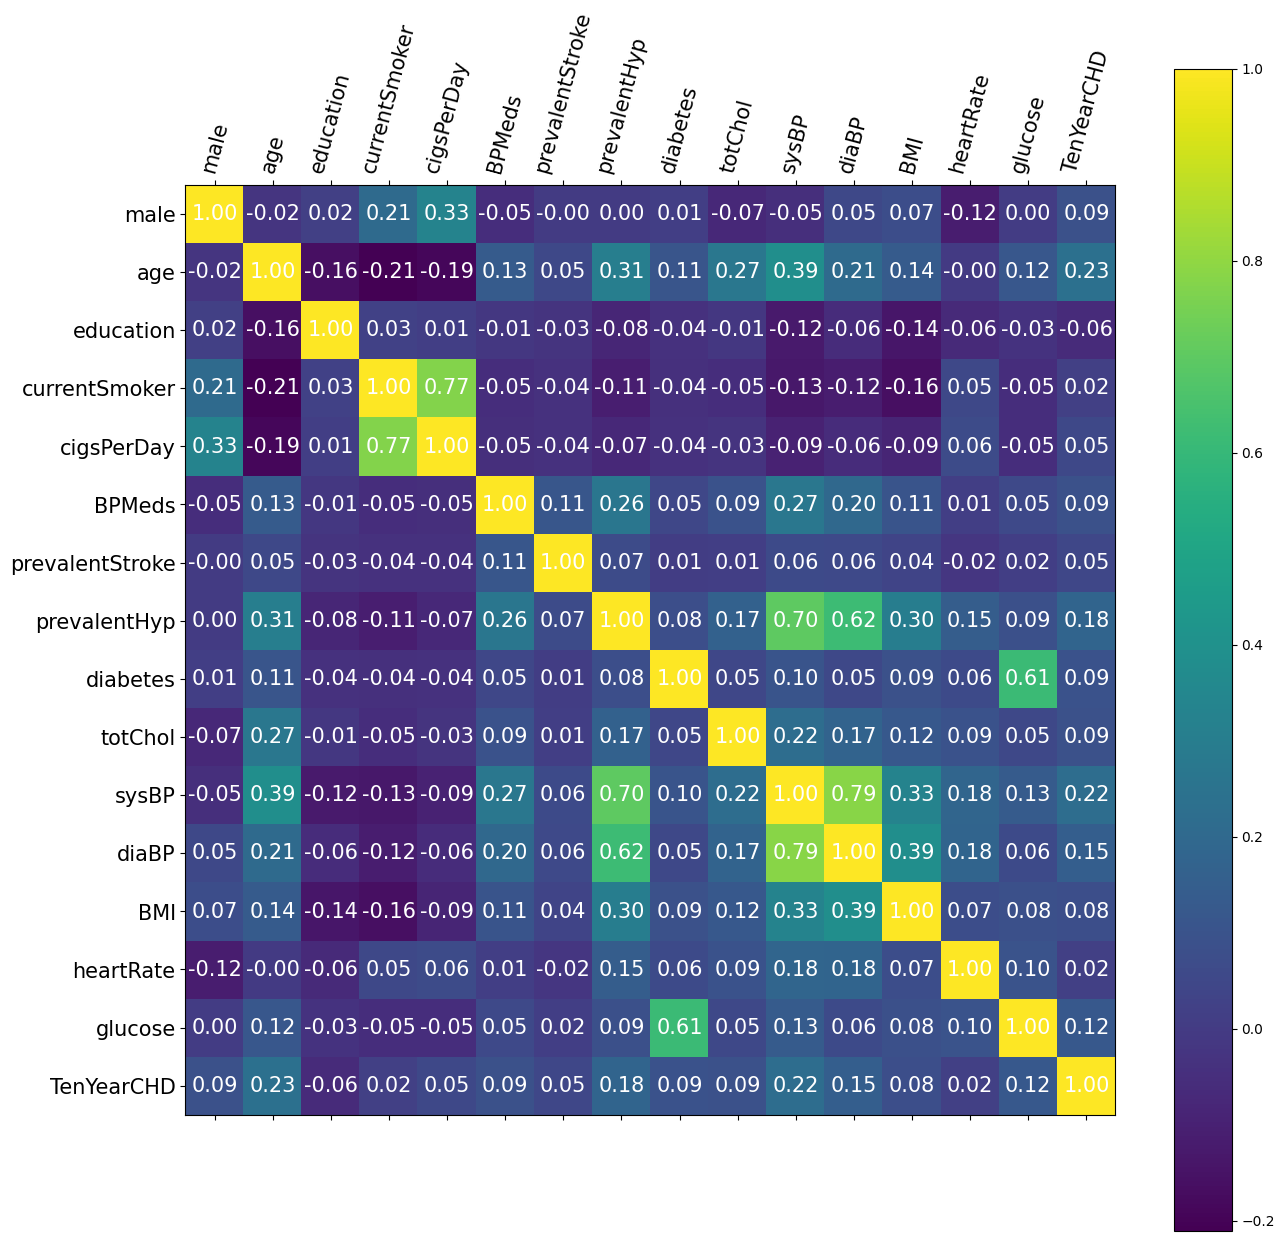

In [9]:
f = plt.figure(figsize=(15,15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=15, rotation=75)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=15)
cb = plt.colorbar()

for (i, j), val in np.ndenumerate(df.corr()):
  plt.text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=15, color="white")

plt.show()

## Dropping Columns With Low Correlation

In [10]:
df = df.drop(columns=['male', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'diabetes', 'totChol', 'BMI', 'heartRate'])

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

df

,age,prevalentHyp,sysBP,diaBP,glucose,TenYearCHD
0,39,0,106.0,70.0,77.0,0
1,46,0,121.0,81.0,76.0,0
2,48,0,127.5,80.0,70.0,0
3,61,1,150.0,95.0,103.0,1
4,46,0,130.0,84.0,85.0,0
...,...,...,...,...,...,...
3653,50,1,179.0,92.0,86.0,1
3654,51,0,126.5,80.0,68.0,0
3655,52,0,133.5,83.0,107.0,0
3656,40,1,141.0,98.0,72.0,0


## Visualizing Correlation Matrix (After Dropping Columns With Low Absolute Correlation)

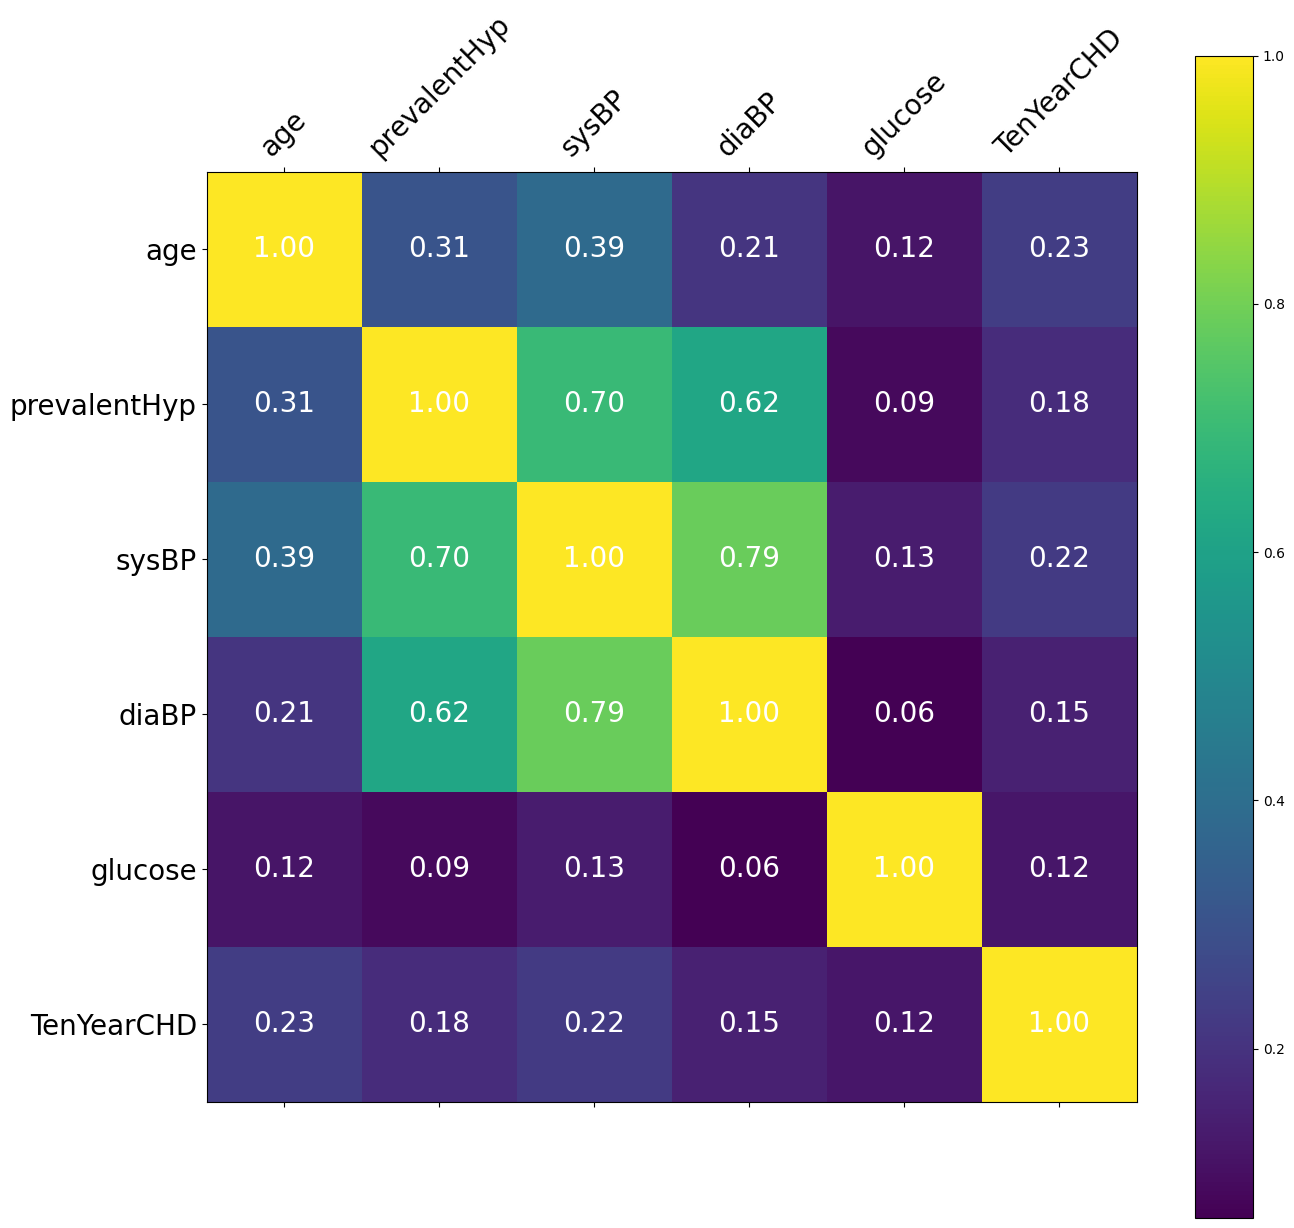

In [11]:
f = plt.figure(figsize=(15,15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=20, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=20)
cb = plt.colorbar()

for (i, j), val in np.ndenumerate(df.corr()):
  plt.text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=20, color="white")

plt.show()

# Model Training


## Splitting The Data Into Training And Test Sets

In [12]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Standardize The Values Of The X_Train And X_Test To A Single Scale

In [13]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

# Applying GridSearchCV To Find The Optimal Parameters Of Each Model

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
  'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
  'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9],
  'learning_rate': [0.25, 0.5, 0.75, 1],
}

grid_search = GridSearchCV(XGBClassifier(objective='binary:logistic', random_state=42), param_grid, scoring='f1')
grid_search.fit(X_Train, Y_Train)

Y_Pred = grid_search.predict(X_Test)

print("Best Parameters: ", grid_search.best_params_)
print("Best F1: ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 60}
Best F1:  0.206171865596326


## Training The Model And Storing The Predicted Values In A Dictionary

In [15]:
# Initialize The Dictionary
Y_Preds = {
}

# Train The Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=250, random_state=42, criterion='entropy')
rfc.fit(X_Train, Y_Train)

Y_Pred = rfc.predict(X_Test)
Y_Preds['Random Forest'] = Y_Pred

# Train The Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=1, min_samples_split=5)
dtc.fit(X_Train, Y_Train)

Y_Pred = dtc.predict(X_Test)
Y_Preds['Decision Tree'] = Y_Pred

# Train The KNN Classifier
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_Train, Y_Train)

Y_Pred = knn.predict(X_Test)
Y_Preds['KNN'] = Y_Pred

# Train The Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_Train, Y_Train)

Y_Pred = gnb.predict(X_Test)
Y_Preds['Naive Bayes'] = Y_Pred

# Train The XGBoost Classifier
xgb = XGBClassifier(random_state=42, n_estimators=9, learning_rate=1, max_depth=5, objective='binary:logistic')
xgb.fit(X_Train, Y_Train)

Y_Pred = xgb.predict(X_Test)
Y_Preds['XGBoost'] = Y_Pred

# Visualization Of Data And Results

# Implement Confussion Matrix

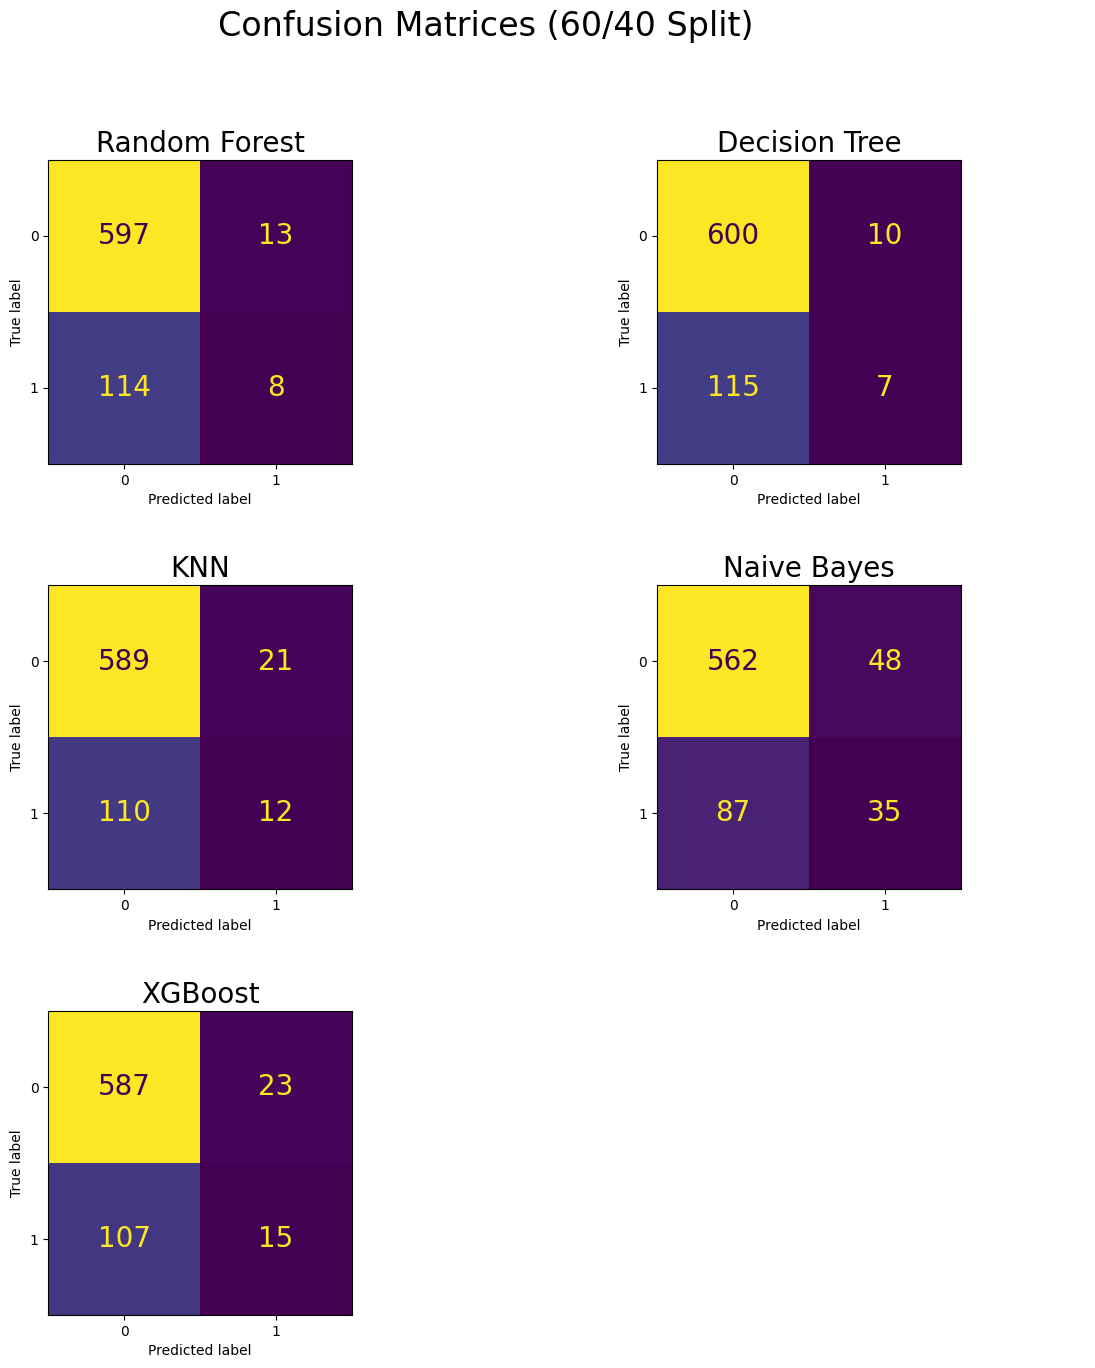

In [16]:
# Initialize And Set The Size Of The Figure
num_models = len(Y_Preds)
cols = 2
rows = (num_models + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), gridspec_kw={ 'hspace': 0.4, 'wspace': 0.1 })
axes = axes.flatten()
fig.suptitle("Confusion Matrices (60/40 Split)", fontsize=24)

metrics = {}

# Calculate The Metrics Of Each Model
for i, (key, y_pred) in enumerate(Y_Preds.items()):
  cm = confusion_matrix(Y_Test, y_pred, labels=[0, 1])
  acc = accuracy_score(Y_Test, y_pred)
  rec = recall_score(Y_Test, y_pred)
  prec = precision_score(Y_Test, y_pred)
  f1 = f1_score(Y_Test, y_pred)

  # Store The Metrics In A Dictionary
  metrics[key] = {
    "Accuracy" : round(acc, 4),
    "Recall"   : round(rec, 4),
    "Precision": round(prec, 4),
    "F1 Score" : round(f1, 4)
  }

  # Visualize Confusion Matrix
  disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
  disp.plot(ax=axes[i], colorbar=False)
  axes[i].set_title(key, fontsize=20)

  for labels in disp.text_.ravel():
    labels.set_fontsize(20)

for j in range(i + 1, len(axes)):
  axes[j].axis('off')

plt.show()

## Visualize The Metrics

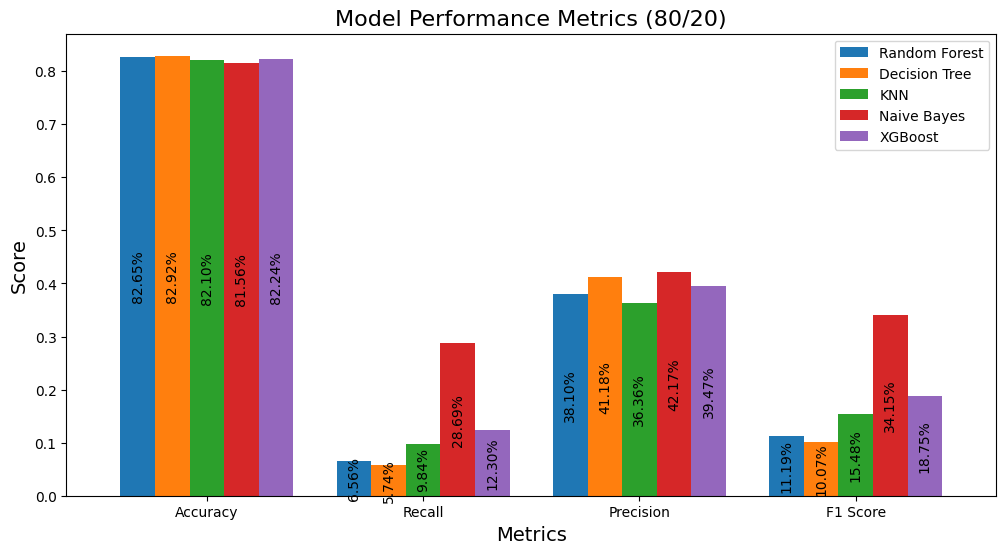

In [27]:
# Convert Dictionary Into DataFrame
df2 = pd.DataFrame(metrics, index=['Accuracy', 'Recall', 'Precision', 'F1 Score'])

# Initialize The Figure
ax = df2.plot(kind='bar', figsize=(12, 6), width=0.8)

ax.set_title("Model Performance Metrics (80/20)", fontsize=16)
ax.set_ylabel("Score", fontsize=14)
ax.set_xlabel("Metrics", fontsize=14)
plt.xticks(rotation=0)

for container in ax.containers:
  labels = [f"{v.get_height() * 100:.2f}%" for v in container]
  ax.bar_label(container, labels=labels, label_type="center", fontsize=10, rotation= 90)

# Visualize The Figure
plt.show()

## Visualize The Training Set Results

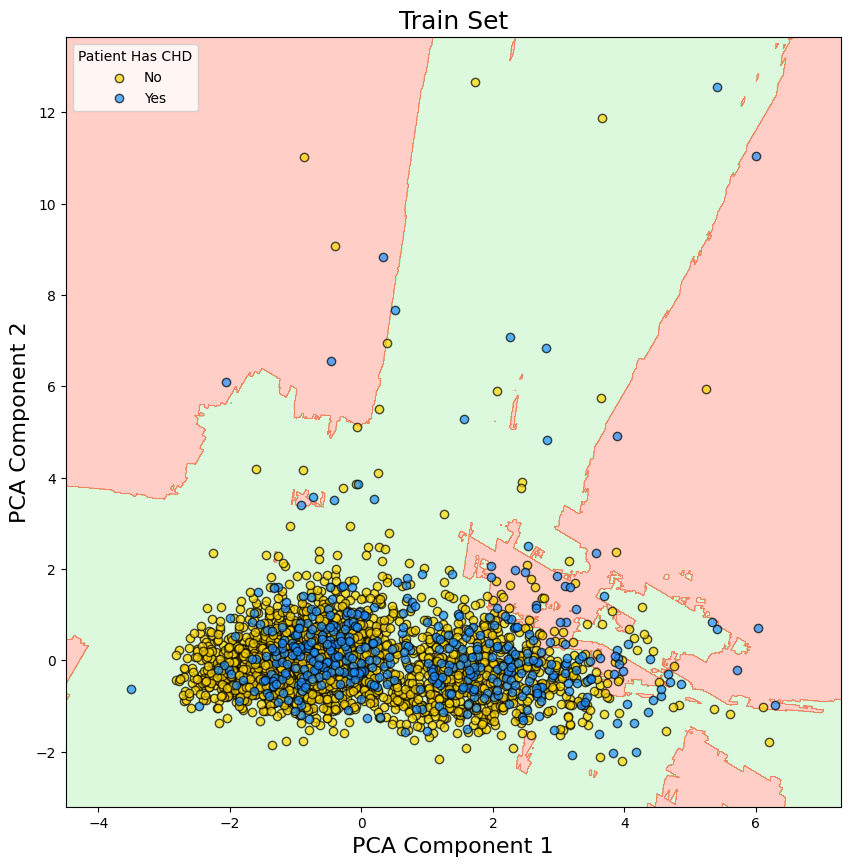

In [28]:
# Set Data
X_Set, Y_Set = X_Train, Y_Train

# Initialize The Figure
plt.figure(figsize=(10, 10))

# Reduce The Features Into Two Components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_Set)

# Implement A Meshgrid To Visualize The Features
X1, X2 = np.meshgrid(np.arange(start = X_pca[:, 0].min() - 1, stop = X_pca[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_pca[:, 1].min() - 1, stop = X_pca[:, 1].max() + 1, step = 0.01))

X_meshgrid = pca.inverse_transform(np.array([X1.ravel(), X2.ravel()]).T)

"""
Random Forest - rfc
Decision Tree - dtc
KNN - knn
Naive Bayes - gnb
XGBoost - xgb
"""
# Define Classifier (change classifier here)
classifier = rfc

# Predict On Meshgrid
Y_pred_meshgrid = classifier.predict(X_meshgrid)
Y_pred_meshgrid = Y_pred_meshgrid.reshape(X1.shape)

# Plot Decision Boundary
plt.contourf(X1, X2, Y_pred_meshgrid, alpha = 0.3, cmap = ListedColormap(['#90EE90', '#FF6347']))

# Scatter Plot For Train Set Points
scatter_colors = ListedColormap(['#FFD700', '#1E90FF'])
for i, label in enumerate(np.unique(Y_Set)):
    plt.scatter(
        X_pca[Y_Set == label, 0], X_pca[Y_Set == label, 1],
        color = scatter_colors(i), label = "Yes" if label == 1 else "No", edgecolor='k', alpha = 0.7)

plt.title('Train Set', fontsize=18)
plt.xlabel("PCA Component 1", fontsize=16)
plt.ylabel("PCA Component 2", fontsize=16)
plt.legend(title="Patient Has CHD")
plt.show()

## Visualize The Test Set Results

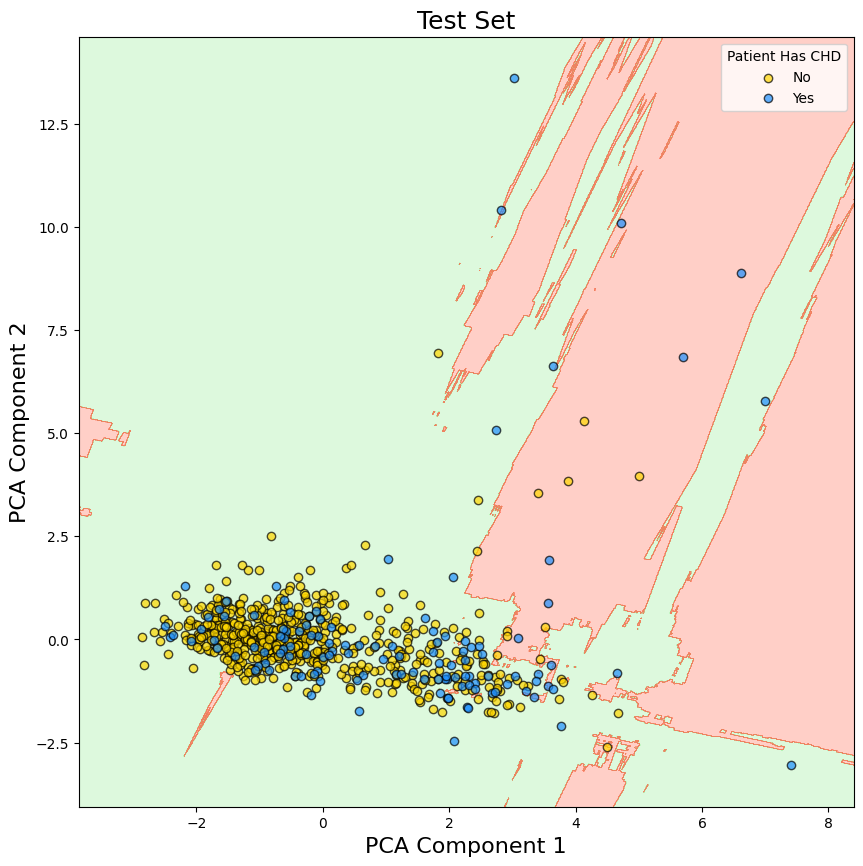

In [29]:
# Set Data
X_Set, Y_Set = X_Test, Y_Test

# Initialize The Figure
plt.figure(figsize=(10, 10))

# Reduce The Features Into Two Components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_Set)

# Implement A Meshgrid To Visualize The Features
X1, X2 = np.meshgrid(np.arange(start = X_pca[:, 0].min() - 1, stop = X_pca[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_pca[:, 1].min() - 1, stop = X_pca[:, 1].max() + 1, step = 0.01))

X_meshgrid = pca.inverse_transform(np.array([X1.ravel(), X2.ravel()]).T)

"""
Random Forest - rfc
Decision Tree - dtc
KNN - knn
Naive Bayes - gnb
XGBoost - xgb
"""
# Define Classifier (change classifier here)
classifier = rfc

# Predict On Meshgrid
Y_pred_meshgrid = classifier.predict(X_meshgrid)
Y_pred_meshgrid = Y_pred_meshgrid.reshape(X1.shape)

# Plot Decision Boundary
plt.contourf(X1, X2, Y_pred_meshgrid, alpha = 0.3, cmap = ListedColormap(['#90EE90', '#FF6347']))

# Scatter Plot For Test Set Points
scatter_colors = ListedColormap(['#FFD700', '#1E90FF'])
for i, label in enumerate(np.unique(Y_Set)):
    plt.scatter(
        X_pca[Y_Set == label, 0], X_pca[Y_Set == label, 1],
        color = scatter_colors(i), label = "Yes" if label == 1 else "No", edgecolor='k', alpha = 0.7)

plt.title('Test Set', fontsize=18)
plt.xlabel("PCA Component 1", fontsize=16)
plt.ylabel("PCA Component 2", fontsize=16)
plt.legend(title="Patient Has CHD")
plt.show()